# I. Importando banco de dados

In [3]:
#Importando bibliotecas
import scipy
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

plt.style.use("ggplot")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Importando dataset
df = pd.read_csv("C:/Users/pedro.martins/OneDrive - Kestraa/25 do 12/Python Scripts/Machine Learning/Dados/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Verificando valores faltantes 

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Removendo outliers

### Função

In [7]:
#Remove outliers
def remove_outliers(dataframe, colunas):
    
    for i in colunas:
        mediana = np.median(dataframe[i])
        Q3 = dataframe[i].quantile(0.75)
        Q1 = dataframe[i].quantile(0.25)

        IQR = Q3 - Q1

        limite_inferior = Q1 - (IQR * 1.5)
        limite_superior = Q3 + (IQR * 1.5)
        
        dataframe.loc[(dataframe[i] < limite_inferior) | (dataframe[i] > limite_superior), i] = mediana

Boxplot pós remoção

In [11]:
columns = df.columns.drop('quality')

<AxesSubplot:xlabel='residual sugar'>

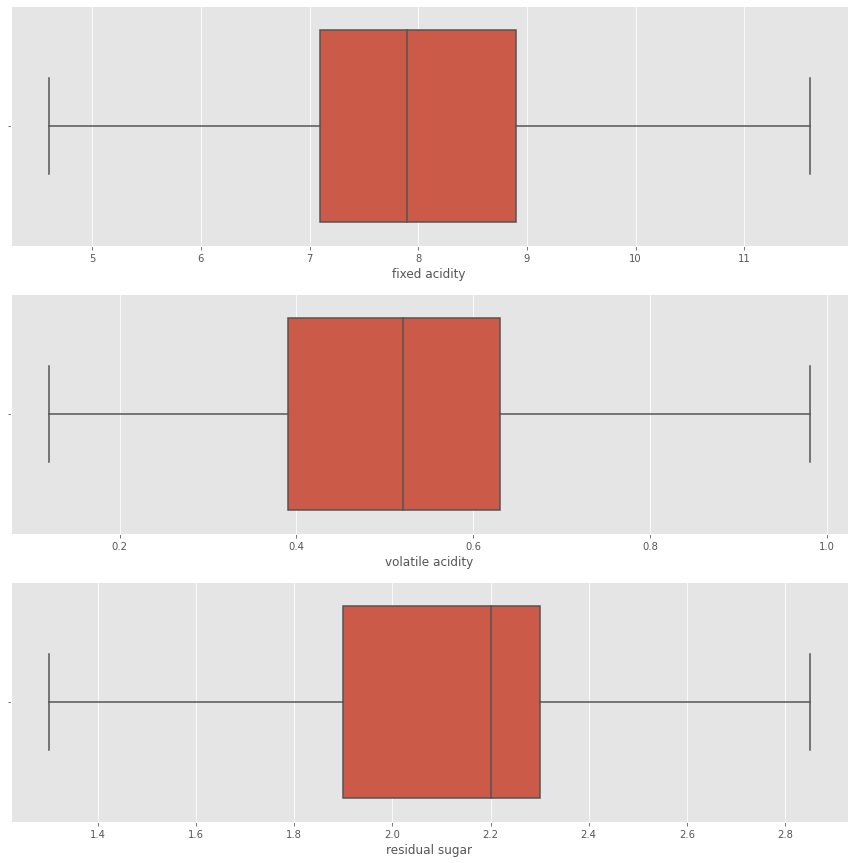

In [22]:
for i in range(5):
    remove_outliers(df, columns)

fig, a = plt.subplots(3, figsize=(15,15))

        
sns.boxplot(x= df["fixed acidity"], ax = a[0])
sns.boxplot(x= df["volatile acidity"], ax = a[1])
sns.boxplot(x= df["residual sugar"], ax = a[2])

<AxesSubplot:xlabel='alcohol'>

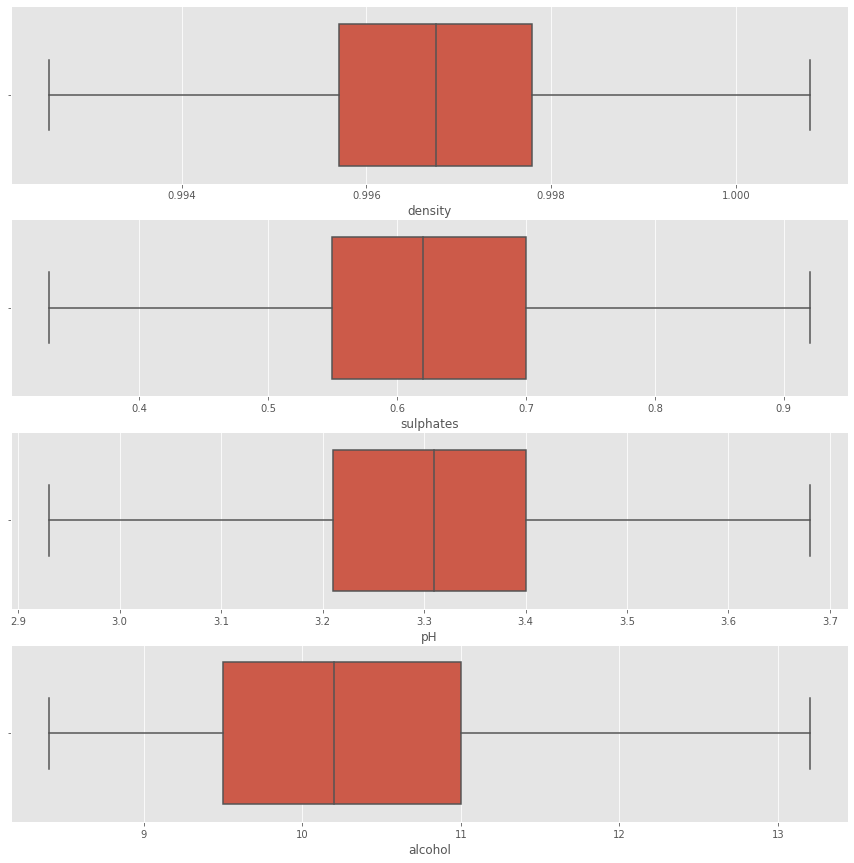

In [21]:
fig, a = plt.subplots(4, figsize=(15,15))

sns.boxplot(x= df["density"], ax = a[0])
sns.boxplot(x= df["sulphates"], ax = a[1])
sns.boxplot(x= df["pH"], ax = a[2])
sns.boxplot(x= df["alcohol"], ax = a[3])

<AxesSubplot:xlabel='total sulfur dioxide'>

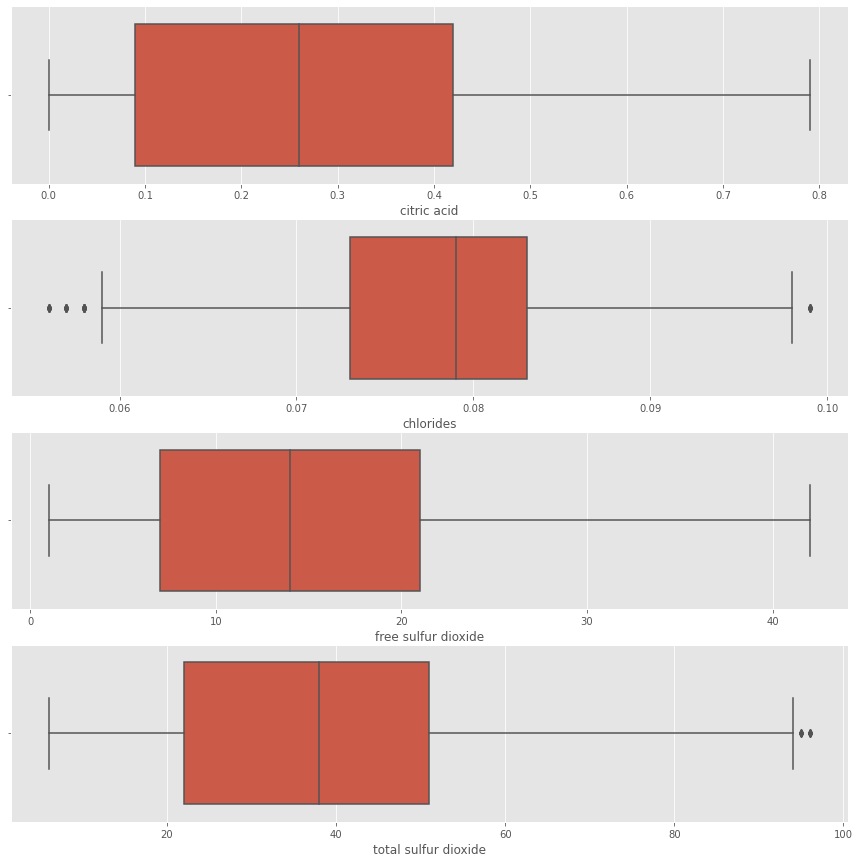

In [18]:
fig, a = plt.subplots(4, figsize=(15,15))

sns.boxplot(x= df["citric acid"], ax = a[0])
sns.boxplot(x= df["chlorides"], ax = a[1])
sns.boxplot(x= df["free sulfur dioxide"], ax = a[2])
sns.boxplot(x= df["total sulfur dioxide"], ax = a[3])

# II. Visualizando e entendendo o dataset

Text(0.5, 1.0, 'Correlation map')

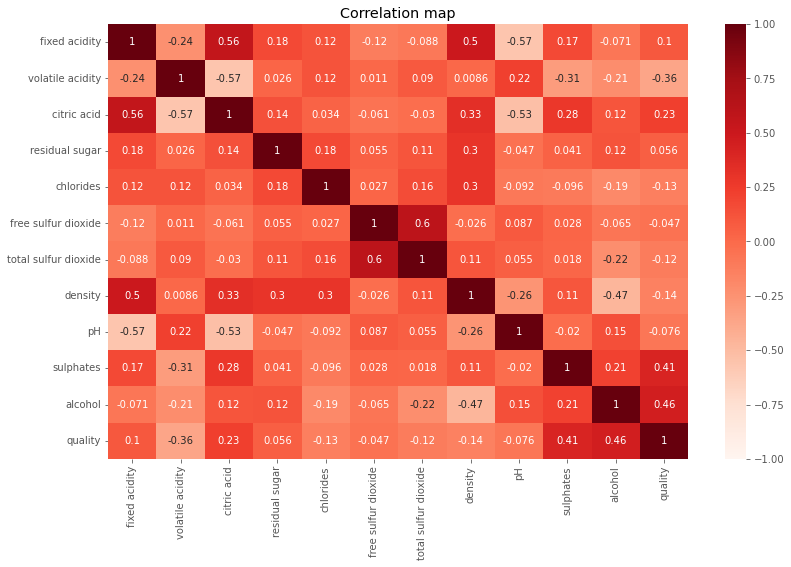

In [23]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot= True, cmap= "Reds", vmin= -1, vmax= 1)
plt.title("Correlation map")

Relações interessantes do heat map:

* O "alcool" é um fator que pode determinar, um pouco, a qualidade do seu vinho.
* O "fixed acidity" e o "citric acid" são substancias muito correlacionadas, elas afetam outras duas caracteristicas do vinho, a " e o "pH". A relação entre a acidez do vinho e a densidade é proporcional, ou seja, quanto mais acido for o vinho maior será a sua densidade, já a relação entre a acidez e o pH é inversamente proporcional, ou seja, quanto mais acido for o vinho menor será o seu pH, isso ocorre pelo fato de que substâncias ácidas têm um pH menor.
* Vinhos com um alto teor alcoólico são menos densos.

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

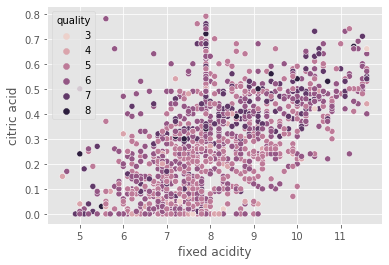

In [24]:
sns.scatterplot(y= df["citric acid"], x= df["fixed acidity"], hue= df.quality)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

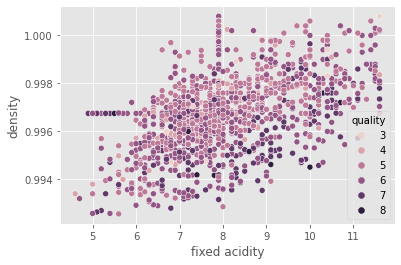

In [25]:
sns.scatterplot(y= df["density"], x= df["fixed acidity"], hue= df.quality)

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

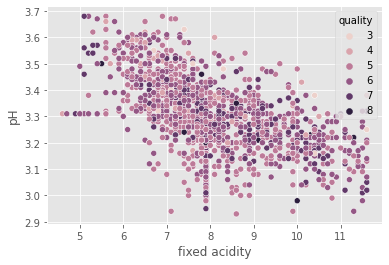

In [26]:
sns.scatterplot(y= df["pH"], x= df["fixed acidity"], hue= df.quality)

<AxesSubplot:xlabel='alcohol', ylabel='density'>

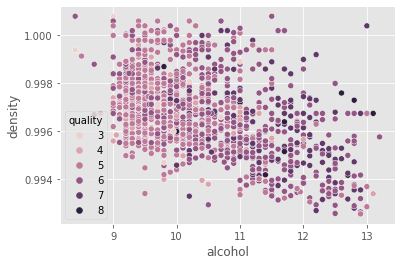

In [27]:
sns.scatterplot(y= df["density"], x= df["alcohol"], hue= df.quality)

<AxesSubplot:xlabel='quality', ylabel='count'>

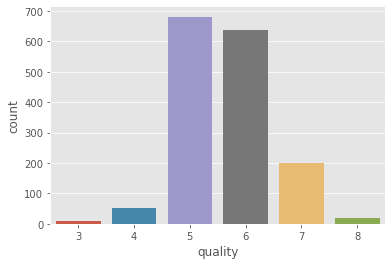

In [28]:
sns.countplot(x = df.quality)

## Relação entre a qualidade do vinho e suas caracteristicas

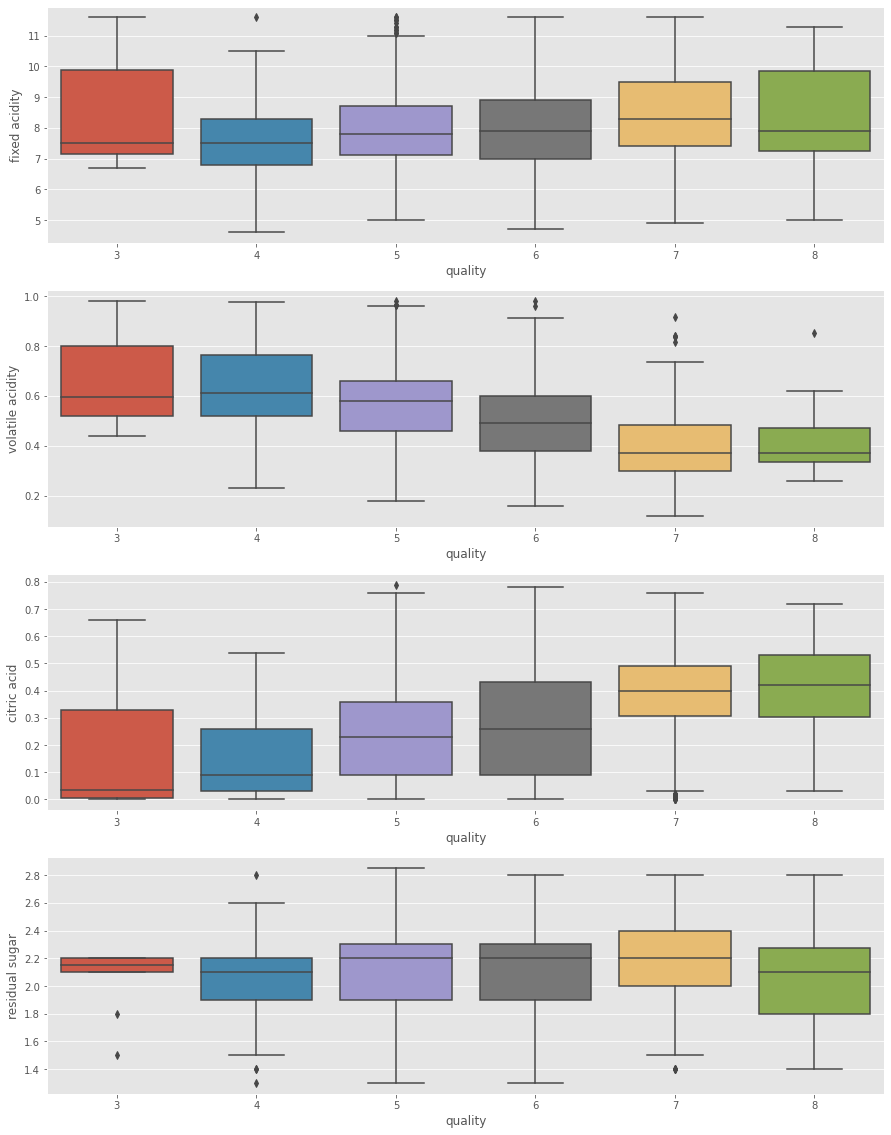

In [29]:
fig, ax1 = plt.subplots(4, figsize=(15,20))
columns = list(df.drop(columns= ['quality']).columns)
k = 0

for i in range(4):          
        sns.boxplot(x = df.quality, y= df[columns[k]], ax = ax1[i])
        k += 1
        

O fator que impacta significativamente a qualidade do vinho é o "volatile acidity", quanto menor for o melhor será o vinho.


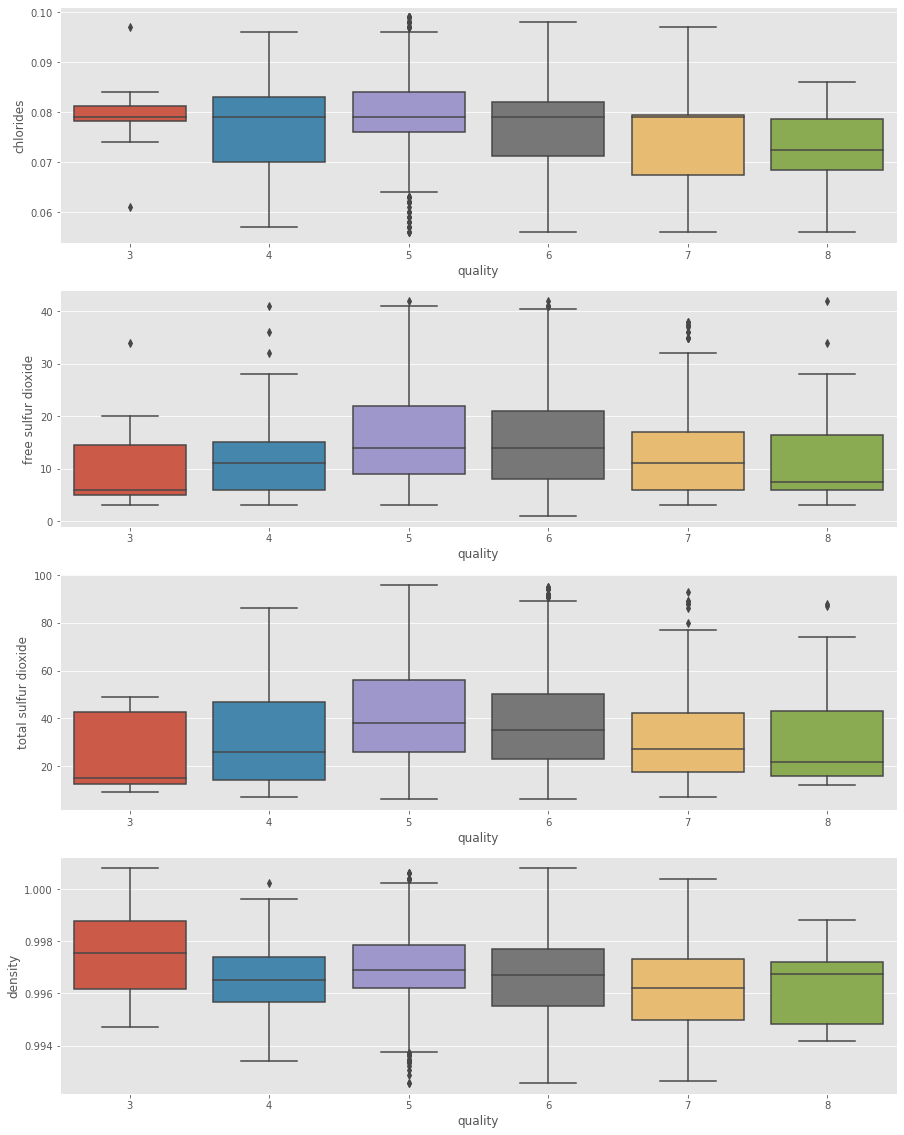

In [30]:
fig, ax = plt.subplots(4, figsize=(15,20))

for i in range(4):             
        sns.boxplot(x = df.quality, y= df[columns[k]], ax = ax[i])
        k += 1

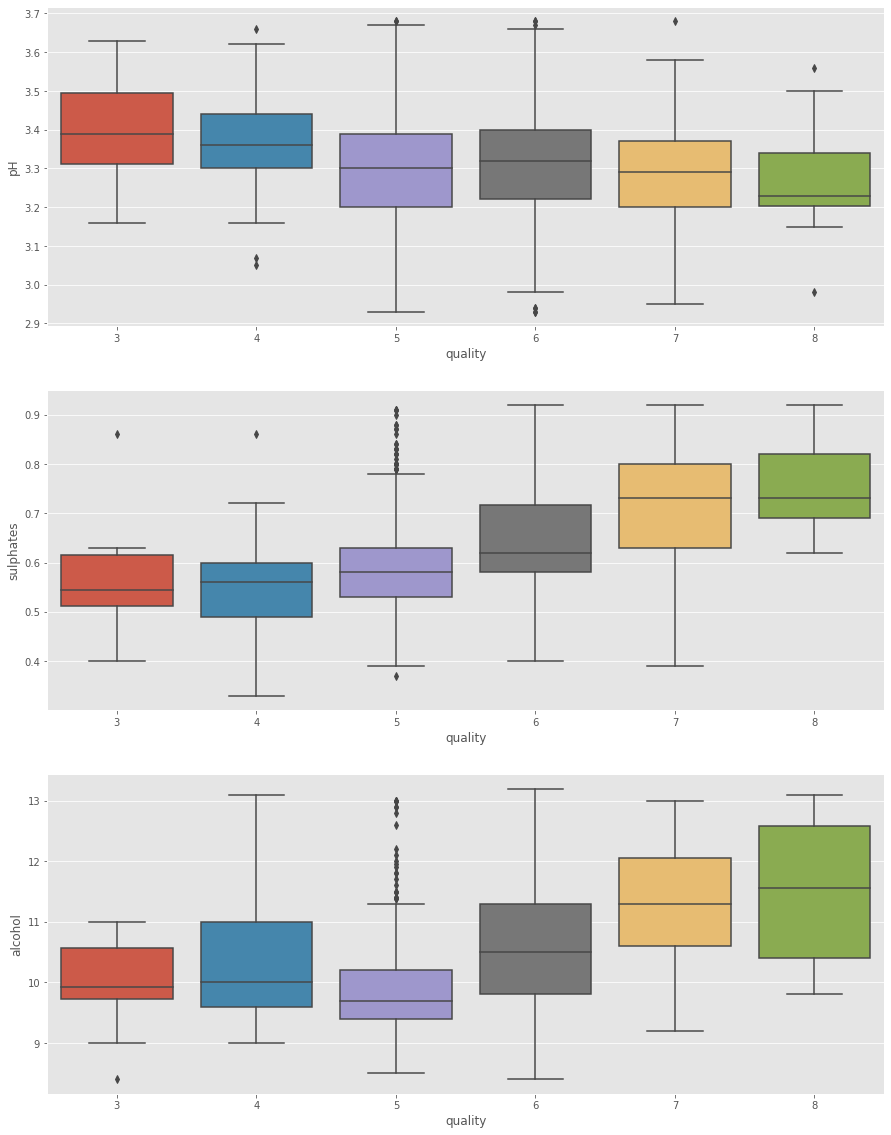

In [31]:
fig, ax2 = plt.subplots(3, figsize=(15,20))

for i in range(3):             
        sns.boxplot(x = df.quality, y= df[columns[k]], ax = ax2[i])
        k += 1

Como foi visto no heatmap, vinhos com um alto teor alcoólico costumam ter uma alta qualidade, porém isso não significa que o alcool seja um fator desicivo para a qualidade do vinho, visto que a qualidade depende de varios fatores, com isso, é possivel observar vinhos com um alto teor alcoólico e uma qualidade baixa.

C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pedro.martins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

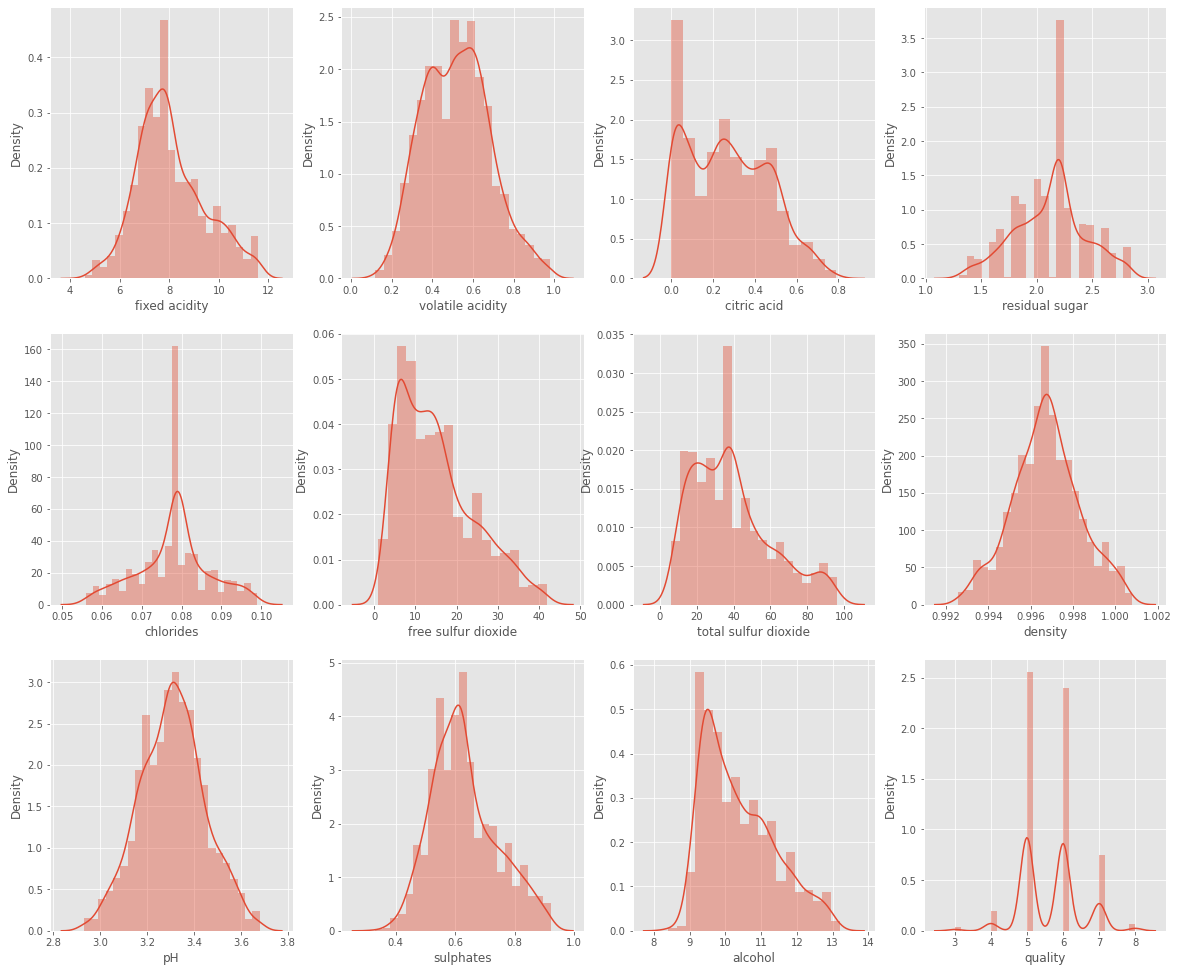

In [32]:
fig, ax1 = plt.subplots(3, 4, figsize=(20,17))
columns = list(df.columns)
k = 0

for i in range(3):
    for j in range(4):
        sns.distplot( df[columns[k]], ax = ax1[i][j])
        k += 1

# III. Modelos

In [33]:
# Preparando dados de qualidade
df['quality'] = ['good' if x>=6.5 else "bad" for x in df['quality']]

previsores = df.drop(columns="quality").values
classe = df["quality"].values

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)
valor = []

## Random Forest

In [34]:
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)
previsoes = floresta.predict(X_teste)

score = accuracy_score(y_teste, previsoes)

print(f"Matriz confusão: \n{confusion_matrix(y_teste, previsoes)}")
print(f"\n\nAccuracy: {accuracy_score(y_teste, previsoes)}")

valor.append(("Random Forest Classifier", score))

Matriz confusão: 
[[413  17]
 [ 24  26]]


Accuracy: 0.9145833333333333


## Naive Bayes

In [35]:
nb = GaussianNB()
nb.fit(X_treinamento, y_treinamento)
previsoes = nb.predict(X_teste)

score = accuracy_score(y_teste, previsoes)

print(f"Matriz confusão: \n{confusion_matrix(y_teste, previsoes)}")
print(f"\n\nAccuracy: {accuracy_score(y_teste, previsoes)}")

valor.append(("Naive Bayes",score))

Matriz confusão: 
[[367  63]
 [ 20  30]]


Accuracy: 0.8270833333333333


## KNeighbors

In [36]:
neighbors = KNeighborsClassifier(n_neighbors=3)
neighbors.fit(X_treinamento, y_treinamento)
previsoes = neighbors.predict(X_teste)

score = accuracy_score(y_teste, previsoes)

print(f"Matriz confusão: \n{confusion_matrix(y_teste, previsoes)}")
print(f"\n\nAccuracy: {accuracy_score(y_teste, previsoes)}")

valor.append(("KNeighbors Classifier", score))

Matriz confusão: 
[[401  29]
 [ 37  13]]


Accuracy: 0.8625


## Decision Tree

In [37]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_treinamento, y_treinamento)
previsoes = tree.predict(X_teste)

score = accuracy_score(y_teste, previsoes)

print(f"Matriz confusão: \n{confusion_matrix(y_teste, previsoes)}")
print(f"\n\nAccuracy: {accuracy_score(y_teste, previsoes)}")

valor.append(("Decision Tree Classifier", score))

Matriz confusão: 
[[397  33]
 [ 17  33]]


Accuracy: 0.8958333333333334


In [38]:
modelos = pd.DataFrame(valor, columns = ['Name', 'Accuracy'])
modelos.sort_values(by= 'Accuracy')

,Name,Accuracy
1,Naive Bayes,0.827083
2,KNeighbors Classifier,0.862500
3,Decision Tree Classifier,0.895833
0,Random Forest Classifier,0.914583


Text(0.5, 1.0, 'Modelos')

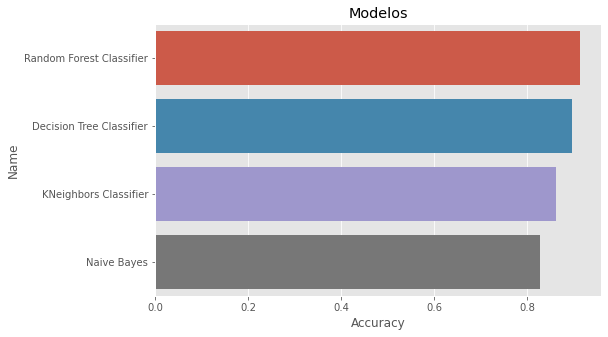

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(y= modelos.Name, x= modelos.Accuracy, order= ["Random Forest Classifier", "Decision Tree Classifier", "KNeighbors Classifier", "Naive Bayes"])
plt.title("Modelos")